In [9]:
import cv2
import getData
import numpy as np
import matplotlib.pyplot as plt


In [10]:
#Function for creating histogram for an image
def Create_Hist(img_path):
  grey = cv2.imread(img_path, 0)
  temp_hist, _ = np.histogram(grey, bins=256, range=(0.0, 255.0))
  return(temp_hist)

In [11]:
#create histograms for series of image
a, b, aa, bb, aaa, bbb = getData.getTestValTrainSplit("0")
images = a + aa + aaa
segs = b + bb + bbb

#loop all images and add histogram
total_hist_img = np.zeros(256)
total_hist_seg = np.zeros(256)

for i in range(len(images)):
  #print("process img: ", i)
  temp_hist_img = Create_Hist(images[i])
  temp_hist_seg = Create_Hist(segs[i])
  total_hist_img += temp_hist_img
  total_hist_seg += temp_hist_seg


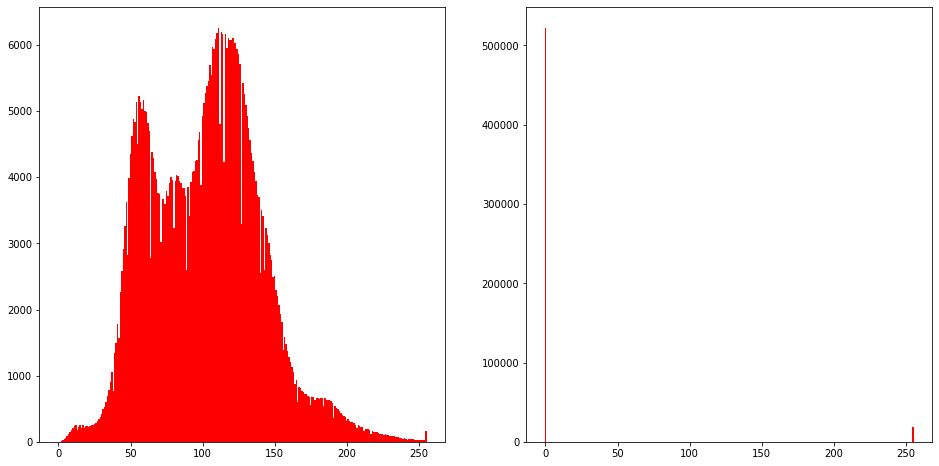

In [12]:
#bar plot of total histogram
const = 1/len(images)
totalHist_img = total_hist_img*const
totalHist_seg = total_hist_seg*const
width = 1.0


plt.figure(figsize=(16,8))
pos_img = np.arange(len(totalHist_img))
plt.subplot(1,2,1)
plt.bar(pos_img, totalHist_img, width, color='r')

plt.subplot(1, 2, 2)
pos_seg = np.arange(len(totalHist_seg))
plt.bar(pos_seg, totalHist_seg, width, color='r')
plt.show()


In [35]:
import scipy.stats as stats
import math


In [42]:
temp2 = [[total_hist_img[i], i]for i in range(0, 256)]

print(temp2[0])

[108.0, 0]


In [54]:
rng = np.random.RandomState(seed=1)

X = np.concatenate([rng.normal(-1, 1.5, 350),
                    rng.normal(0, 1, 500),
                    rng.normal(3, 0.5, 150)]).reshape(-1, 1)


[[ 1.43651805e+00]
 [-1.91763462e+00]
 [-1.79225763e+00]
 [-2.60945293e+00]
 [ 2.98111444e-01]
 [-4.45230805e+00]
 [ 1.61721765e+00]
 [-2.14181035e+00]
 [-5.21441356e-01]
 [-1.37405556e+00]
 [ 1.19316191e+00]
 [-4.09021106e+00]
 [-1.48362581e+00]
 [-1.57608153e+00]
 [ 7.00654164e-01]
 [-2.64983690e+00]
 [-1.25864231e+00]
 [-2.31678763e+00]
 [-9.36679380e-01]
 [-1.25777179e-01]
 [-2.65092877e+00]
 [ 7.17085565e-01]
 [ 3.52386081e-01]
 [-2.46258492e-01]
 [ 3.51283924e-01]
 [-2.02559179e+00]
 [-1.18433534e+00]
 [-2.40365415e+00]
 [-1.40183212e+00]
 [-2.04466800e-01]
 [-2.03749113e+00]
 [-1.59513029e+00]
 [-2.03075905e+00]
 [-2.26780846e+00]
 [-2.00686920e+00]
 [-1.01899690e+00]
 [-2.67596552e+00]
 [-6.48376453e-01]
 [ 1.48970327e+00]
 [ 1.13066241e-01]
 [-1.28775333e+00]
 [-2.33144345e+00]
 [-2.12073744e+00]
 [ 1.53868190e+00]
 [-9.23788368e-01]
 [-1.95549347e+00]
 [-7.13626773e-01]
 [ 2.15038270e+00]
 [-8.19761571e-01]
 [-7.41953354e-02]
 [-5.49744520e-01]
 [-1.52837477e+00]
 [-2.7137773

In [61]:
X = totalHist_img.reshape(-1, 1)
gmm = GaussianMixture(n_components=2)
gmm = gmm.fit(X)


def gauss_function(x, amp, x0, sigma):
    return amp * np.exp(-(x - x0) ** 2. / (2. * sigma ** 2.))

gmm.means_


array([[ 316.19405657],
       [3950.48183734]])

In [63]:
# Plot function
def plot_mixture(gmm, X, show_legend=True, ax=None):
 if ax is None:
  ax = plt.gca()

 # Compute PDF of whole mixture
 x = np.linspace(-6, 6, 1000)
 logprob = gmm.score_samples(x.reshape(-1, 1))
 pdf = np.exp(logprob)

 # Compute PDF for each component
 responsibilities = gmm.predict_proba(x.reshape(-1, 1))
 pdf_individual = responsibilities * pdf[:, np.newaxis]
 # Plot data histogram
 ax.hist(X, 30, density=True, histtype='stepfilled', alpha=0.4, label='Data')

 # Plot PDF of whole model
 ax.plot(x, pdf, '-k', label='Mixture PDF')

 # Plot PDF of each component
 ax.plot(x, pdf_individual, '--', label='Component PDF')
 ax.set_xlabel('$x$')
 ax.set_ylabel('$p(x)$')
 if show_legend:
  ax.legend()


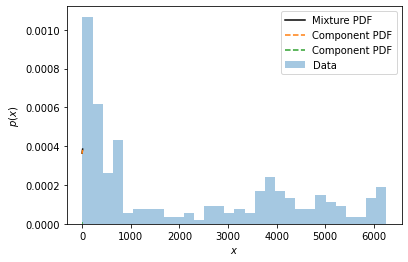

In [64]:
plot_mixture(gmm,X)

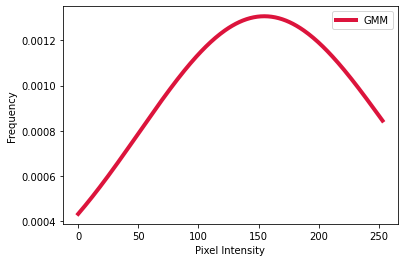

In [69]:
gmm = GaussianMixture(n_components=7)
gmm = gmm.fit(X)

# Evaluate GMM
gmm_x = np.linspace(0, 253, 256)
gmm_y = np.exp(gmm.score_samples(gmm_x.reshape(-1, 1)))


# Plot histograms and gaussian curves
fig, ax = plt.subplots()
#ax.hist(img.ravel(), 255, [2, 256], normed=True)
ax.plot(gmm_x, gmm_y, color="crimson", lw=4, label="GMM")

ax.set_ylabel("Frequency")
ax.set_xlabel("Pixel Intensity")

plt.legend()

plt.show()


In [ ]:
for i in range(len(gmm.means_)):
  mu = gmm.means_[i][0]
  variance = gmm.means_[i][1]
  sigma = math.sqrt(variance)
  x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
  plt.plot(x, stats.norm.pdf(x, mu, sigma))
  plt.show()


total: 21941202.0 810030.0
avg: 522409.5714285714 19286.42857142857
background %:  96.43962137962463
artery %:  3.5603786203753716
Ratio of bg to artery:  27.086900485167217


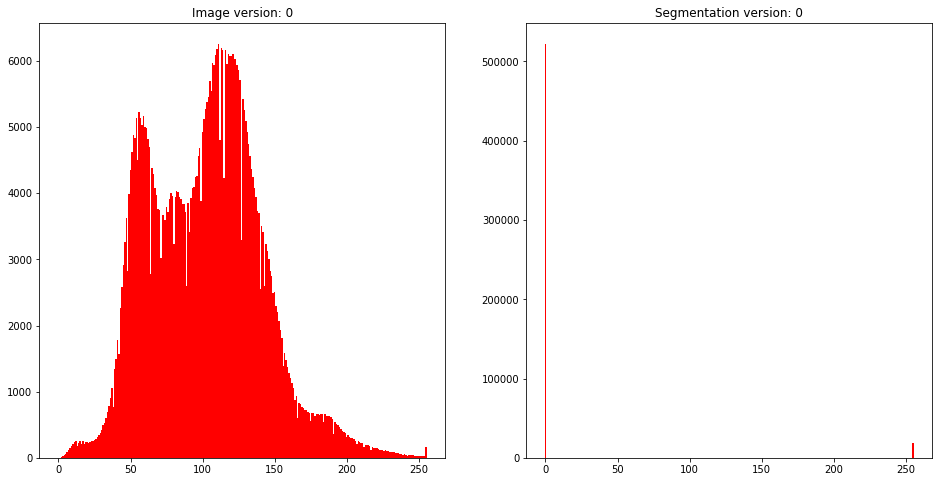

total: 16538521.0 795751.0
avg: 516828.78125 24867.21875
background %:  95.40937744602138
artery %:  4.590622553978616
Ratio of bg to artery:  20.78353781522109


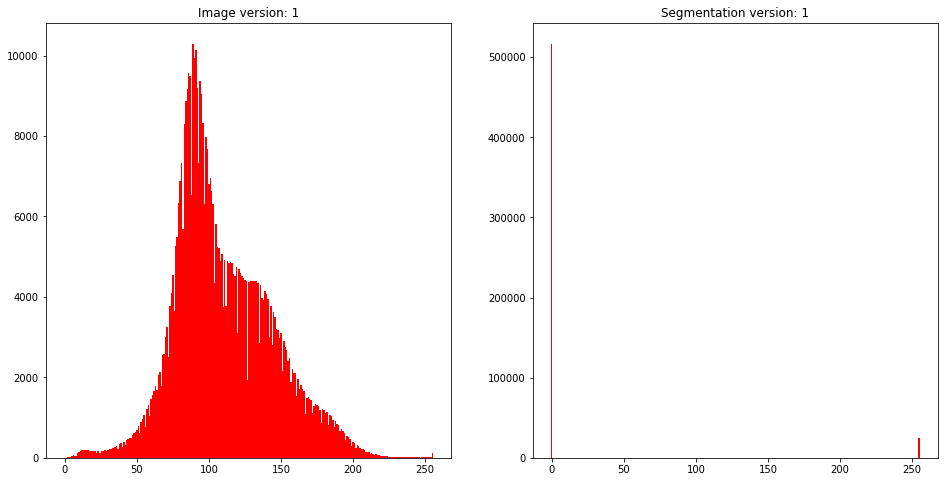

total: 18147964.0 1353092.0
avg: 504110.11111111107 37585.88888888888
background %:  93.06144241624659
artery %:  6.938557583753413
Ratio of bg to artery:  13.412217351074428


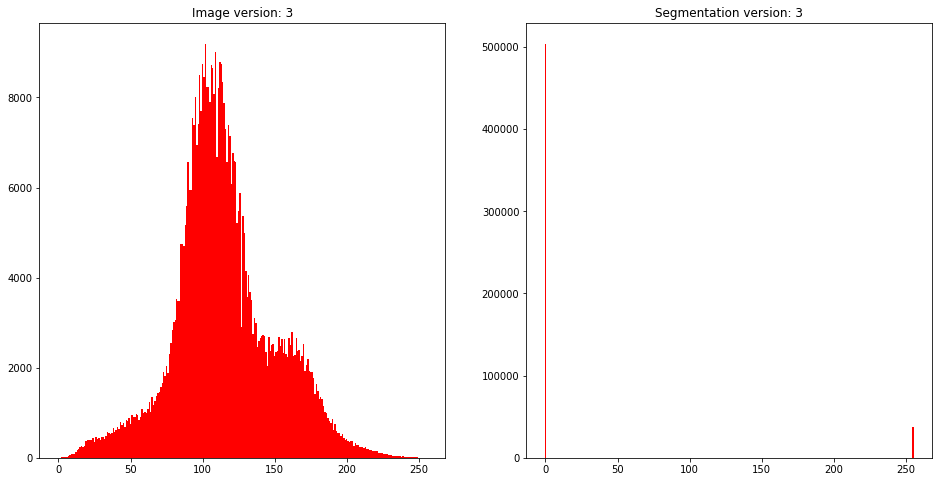

total: 19653912.0 1472232.0
avg: 503946.4615384615 37749.53846153846
background %:  93.03123182346954
artery %:  6.968768176530464
Ratio of bg to artery:  13.34973835645469


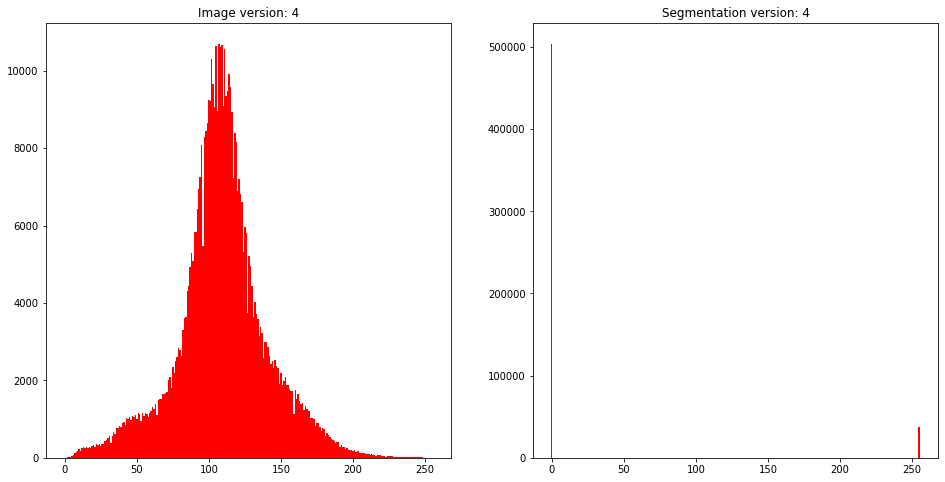

total: 29911761.0 1506607.0
avg: 515720.0172413793 25975.98275862069
background %:  95.20469363653771
artery %:  4.7953063634622906
Ratio of bg to artery:  19.85372495946189


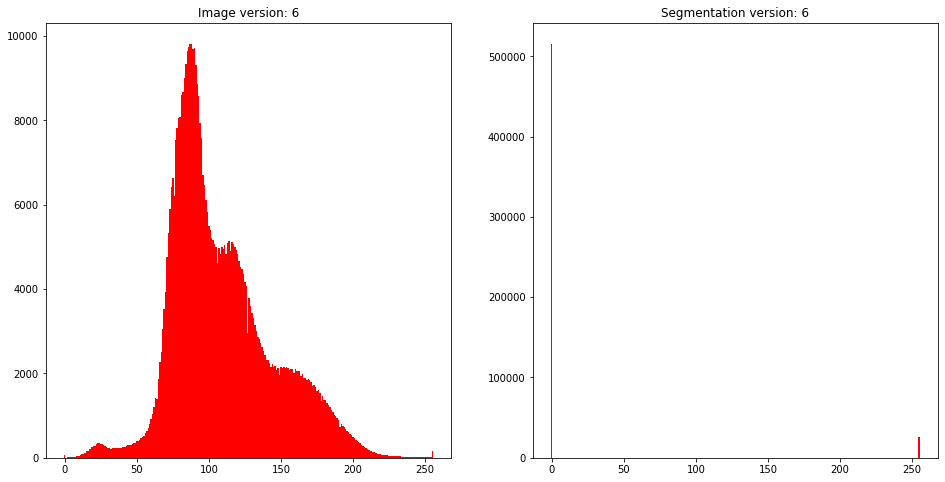

total: 29329624.0 1547048.0
avg: 514554.8070175438 27141.192982456138
background %:  94.98958955162007
artery %:  5.010410448379929
Ratio of bg to artery:  18.958444728282508


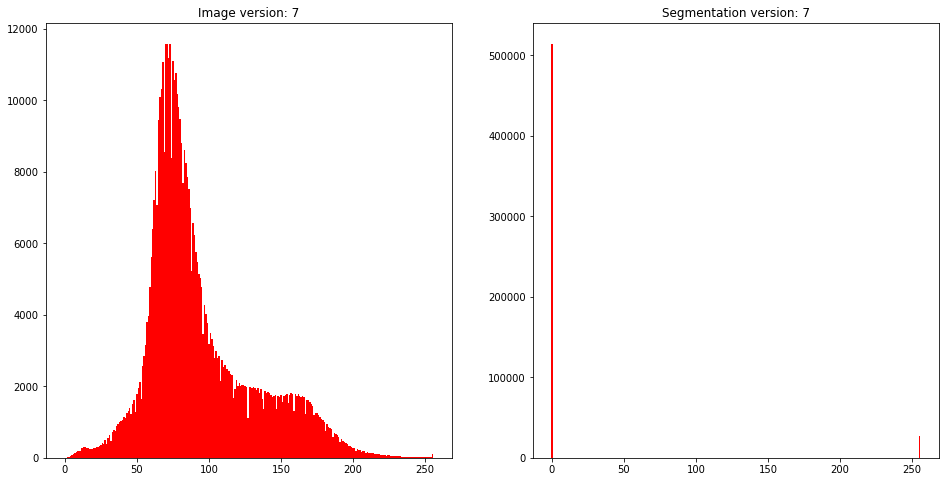

total: 30109285.0 1309083.0
avg: 519125.6034482758 22570.396551724138
background %:  95.83338319800697
artery %:  4.166616801993025
Ratio of bg to artery:  23.000287223957532


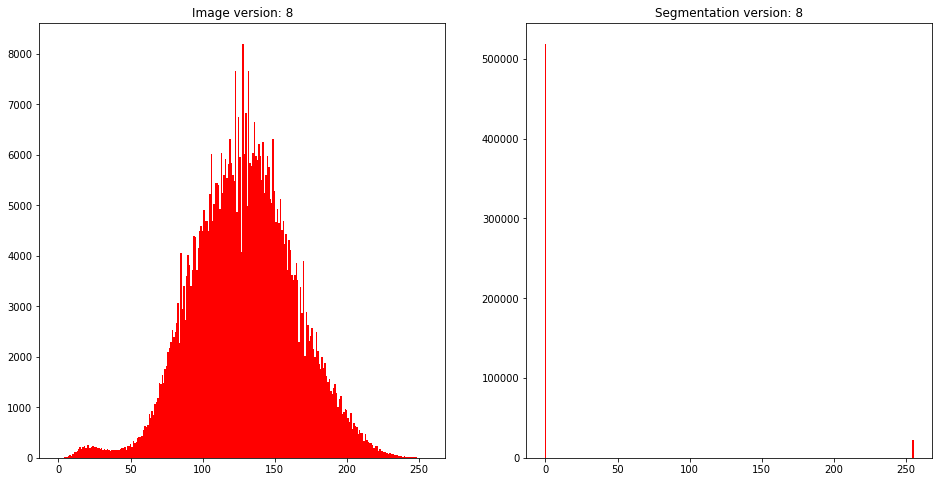

In [6]:
versions = ["0","1","3","4","6","7","8"]

for v in range(len(versions)):
  a, b, aa, bb, aaa, bbb = getData.getTestValTrainSplit(versions[v])
  images = a + aa + aaa
  segs = b + bb + bbb
  
  #loop all images and add histogram
  total_hist_img = np.zeros(256)
  total_hist_seg = np.zeros(256)

  for i in range(len(images)):
    #print("process img: ", i)
    temp_hist_img = Create_Hist(images[i])
    temp_hist_seg = Create_Hist(segs[i])
    total_hist_img += temp_hist_img
    total_hist_seg += temp_hist_seg

  #bar plot of total histogram
  const = 1/len(images)
  totalHist_img = total_hist_img*const
  totalHist_seg = total_hist_seg*const
  width = 1.0

  total = (total_hist_seg[0]+total_hist_seg[255])
  print("total:", total_hist_seg[0], total_hist_seg[255])

  print("avg:", totalHist_seg[0], totalHist_seg[255])

  print("background %: ", (total_hist_seg[0]/total)*100)

  print("artery %: ", (total_hist_seg[255]/total)*100)

  print("Ratio of bg to artery: ",
        (total_hist_seg[0]/total)/(total_hist_seg[255]/total))

  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.title("Image version: " + versions[v])
  pos_img = np.arange(len(totalHist_img))
  plt.bar(pos_img, totalHist_img, width, color='r')

  plt.subplot(1, 2, 2)
  plt.title("Segmentation version: " + versions[v])
  pos_seg = np.arange(len(totalHist_seg))
  plt.bar(pos_seg, totalHist_seg, width, color='r')
  plt.show()


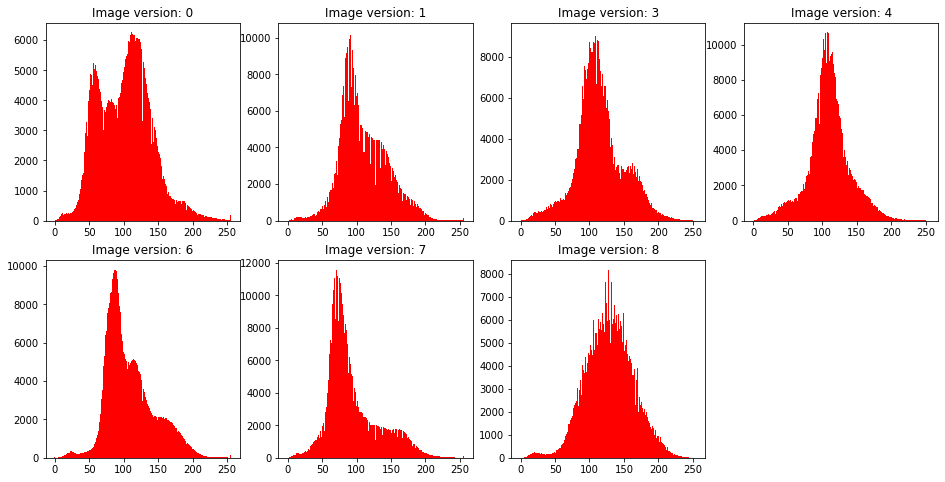

In [7]:
versions = ["0", "1", "3", "4", "6", "7", "8"]

plt.figure(figsize=(16, 8))
for v in range(len(versions)):
  a, b, aa, bb, aaa, bbb = getData.getTestValTrainSplit(versions[v])
  images = a + aa + aaa
  segs = b + bb + bbb

  #loop all images and add histogram
  total_hist_img = np.zeros(256)
  total_hist_seg = np.zeros(256)

  for i in range(len(images)):
    #print("process img: ", i)
    temp_hist_img = Create_Hist(images[i])
    temp_hist_seg = Create_Hist(segs[i])
    total_hist_img += temp_hist_img
    total_hist_seg += temp_hist_seg

  #bar plot of total histogram
  const = 1/len(images)
  totalHist_img = total_hist_img*const
  totalHist_seg = total_hist_seg*const
  width = 1.0

  plt.subplot(2, 4, v +1 )
  plt.title("Image version: " + versions[v])
  pos_img = np.arange(len(totalHist_img))
  plt.bar(pos_img, totalHist_img, width, color='r')

  #plt.subplot(1, 2, 2)
  #plt.title("Segmentation version: " + versions[v])
  #pos_seg = np.arange(len(totalHist_seg))
  #plt.bar(pos_seg, totalHist_seg, width, color='r')
plt.show()


In [8]:
from sklearn.mixture import GaussianMixture
